## Homework

> Note: sometimes your answer doesn't match one of
> the options exactly. That's fine.
> Select the option that's closest to your solution.

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Preparing the dataset

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?


Dataset shape: (9704, 11)


Dataset after selecting columns:
   engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369  


EDA: fuel_efficiency_mpg distribution
count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

Skewness: -0.012
Note: The distribution shows if there's a long tail (positive skew indicates right tail)

Histogram saved as 'fuel_efficienc

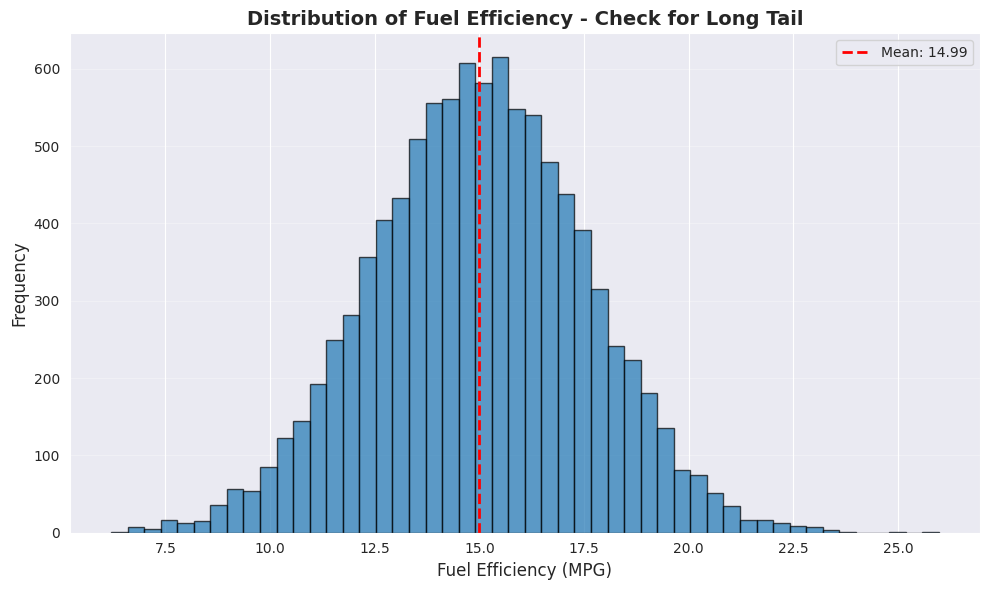

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
url = './car_fuel_efficiency.csv'
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print("\n" + "="*80)

# Select only required columns
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns]

print("\nDataset after selecting columns:")
print(df.head())
print("\n" + "="*80)

# EDA: Check if fuel_efficiency_mpg has a long tail
print("\nEDA: fuel_efficiency_mpg distribution")
print(df['fuel_efficiency_mpg'].describe())
print(f"\nSkewness: {df['fuel_efficiency_mpg'].skew():.3f}")
print("Note: The distribution shows if there's a long tail (positive skew indicates right tail)")

# Create histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['fuel_efficiency_mpg'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Fuel Efficiency (MPG)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Fuel Efficiency - Check for Long Tail', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
# Add a vertical line for the mean
mean_mpg = df['fuel_efficiency_mpg'].mean()
plt.axvline(mean_mpg, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_mpg:.2f}')
plt.legend()

plt.tight_layout()
plt.savefig('fuel_efficiency_distribution.png', dpi=300, bbox_inches='tight')
print("\nHistogram saved as 'fuel_efficiency_distribution.png'")
plt.show()

print("\n" + "="*80)


### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`


In [14]:
# Question 1: Find column with missing values
print("\nQUESTION 1: Column with missing values")
missing = df.isnull().sum()
print(missing)
print(f"\nAnswer: '{missing[missing > 0].index[0]}' has {missing[missing > 0].values[0]} missing values")
print("="*80)


QUESTION 1: Column with missing values
engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Answer: 'horsepower' has 708 missing values



### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [15]:

# Question 2: Median of horsepower
print("\nQUESTION 2: Median (50% percentile) of 'horsepower'")
median_hp = df['horsepower'].median()
print(f"Median horsepower: {median_hp}")
print(f"\nAnswer: {int(median_hp)}")
print("="*80)



QUESTION 2: Median (50% percentile) of 'horsepower'
Median horsepower: 149.0

Answer: 149



### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [17]:

# Prepare and split the dataset
print("\nPreparing and splitting dataset (seed=42, 60/20/20 split)...")
np.random.seed(42)

# Shuffle
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx].reset_index(drop=True)

# Split
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

print(f"Train size: {len(df_train)}")
print(f"Validation size: {len(df_val)}")
print(f"Test size: {len(df_test)}")
print("="*80)

# Question 3: Compare filling NAs with 0 vs mean
print("\nQUESTION 3: Filling missing values - 0 vs mean")

# Identify the column with missing values
missing_col = missing[missing > 0].index[0]

# Prepare features and target
def prepare_X_y(df):
    y = df['fuel_efficiency_mpg'].values
    X = df.drop('fuel_efficiency_mpg', axis=1).values
    return X, y

# Option 1: Fill with 0
df_train_fill0 = df_train.fillna(0)
df_val_fill0 = df_val.fillna(0)

X_train_0, y_train = prepare_X_y(df_train_fill0)
X_val_0, y_val = prepare_X_y(df_val_fill0)

# Train linear regression (using Ridge with r=0 for no regularization)
model_0 = Ridge(alpha=0, fit_intercept=True)
model_0.fit(X_train_0, y_train)
y_pred_0 = model_0.predict(X_val_0)
rmse_0 = np.sqrt(mean_squared_error(y_val, y_pred_0))

print(f"RMSE with filling 0: {round(rmse_0, 2)}")

# Option 2: Fill with mean
mean_value = df_train[missing_col].mean()
print(f"Mean of '{missing_col}' in training set: {mean_value:.2f}")

df_train_fillmean = df_train.fillna(mean_value)
df_val_fillmean = df_val.fillna(mean_value)

X_train_mean, _ = prepare_X_y(df_train_fillmean)
X_val_mean, _ = prepare_X_y(df_val_fillmean)

model_mean = Ridge(alpha=0, fit_intercept=True)
model_mean.fit(X_train_mean, y_train)
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred_mean))

print(f"RMSE with filling mean: {round(rmse_mean, 2)}")

if round(rmse_0, 2) < round(rmse_mean, 2):
    print("\nAnswer: With 0")
elif round(rmse_0, 2) > round(rmse_mean, 2):
    print("\nAnswer: With mean")
else:
    print("\nAnswer: Both are equally good")
print("="*80)



Preparing and splitting dataset (seed=42, 60/20/20 split)...
Train size: 5824
Validation size: 1940
Test size: 1940

QUESTION 3: Filling missing values - 0 vs mean
RMSE with filling 0: 0.52
Mean of 'horsepower' in training set: 149.54
RMSE with filling mean: 0.46

Answer: With mean



### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100


In [43]:
# Question 4: Regularized linear regression
print("\nQUESTION 4: Regularized linear regression with different r values")
print("Filling NAs with 0...")

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}
rmse_scores_precise = {}

for r in r_values:
    model = Ridge(alpha=r, fit_intercept=True)
    model.fit(X_train_0, y_train)
    y_pred = model.predict(X_val_0)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores[r] = round(rmse, 2)
    rmse_scores_precise[r] = rmse
    print(f"r={r:6.2f} -> RMSE: {round(rmse, 2)} (precise: {rmse:.6f})")

# # Plot the results
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# # Plot 2: Log scale for x-axis (better for wide range of r values)
# ax2.semilogx(r_values[1:], list(rmse_scores_precise.values())[1:], 'ro-', linewidth=2, markersize=8)
# ax2.set_xlabel('Regularization Parameter (r) - Log Scale', fontsize=12)
# ax2.set_ylabel('RMSE', fontsize=12)
# ax2.set_title('RMSE vs Regularization Parameter (Log Scale)', fontsize=14, fontweight='bold')
# ax2.grid(True, alpha=0.3, which='both')
#
# plt.tight_layout()
# plt.show()

best_r = min(rmse_scores, key=rmse_scores.get)
print(f"\nBest r: {best_r} with RMSE: {rmse_scores[best_r]}")
print(f"Note: When rounded to 2 decimals, multiple r values may give same RMSE.")
print(f"In such cases, select the smallest r value.")
print("="*80)


QUESTION 4: Regularized linear regression with different r values
Filling NAs with 0...
r=  0.00 -> RMSE: 0.52 (precise: 0.517378)
r=  0.01 -> RMSE: 0.52 (precise: 0.517378)
r=  0.10 -> RMSE: 0.52 (precise: 0.517378)
r=  1.00 -> RMSE: 0.52 (precise: 0.517378)
r=  5.00 -> RMSE: 0.52 (precise: 0.517378)
r= 10.00 -> RMSE: 0.52 (precise: 0.517378)
r=100.00 -> RMSE: 0.52 (precise: 0.517378)

Best r: 0 with RMSE: 0.52
Note: When rounded to 2 decimals, multiple r values may give same RMSE.
In such cases, select the smallest r value.


I found weird why the result where identical whatever the penalisation so i used the ridge formulation from the course, which led to different results before undertanding it what related to w0 the intercept see after for more explanation.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


def train_ridge_regression(features, target, lmbda=0.001):
    n = features.shape[0]
    bias_col = np.ones(n)
    X_full = np.column_stack([bias_col, features])

    gram = X_full.T @ X_full
    penalty = lmbda * np.eye(gram.shape[0])
    # penalty[0, 0] = 0 # uncomment to find the same result as scikit before

    gram_reg = gram + penalty
    gram_inv = np.linalg.inv(gram_reg)
    weights = gram_inv @ X_full.T @ target

    return weights[0], weights[1:]


def extract_features(df):
    df_copy = df.copy()
    numeric_df = df_copy.select_dtypes(include=[np.number])
    return numeric_df.fillna(0).values


def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


print("\nQUESTION 4: Regularized linear regression with different r values")
print("Filling NAs with 0...")

lambda_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_rounded = {}
rmse_exact = {}

for lmbda in lambda_values:
    bias, coefs = train_ridge_regression(X_train_0, y_train, lmbda)
    y_pred = bias + X_val_0 @ coefs
    val_rmse = calculate_rmse(y_val, y_pred)

    rmse_rounded[lmbda] = round(val_rmse, 2)
    rmse_exact[lmbda] = val_rmse

    print(f"r={lmbda:6.2f} -> bias: {bias:8.3f} -> RMSE: {round(val_rmse, 2)} (exact: {val_rmse:.6f})")


QUESTION 4: Regularized linear regression with different r values
Filling NAs with 0...
r=  0.00 -> bias:   28.827 -> RMSE: 0.52 (exact: 0.517378)
r=  0.01 -> bias:   24.927 -> RMSE: 0.52 (exact: 0.517112)
r=  0.10 -> bias:   11.240 -> RMSE: 0.52 (exact: 0.518753)
r=  1.00 -> bias:    1.732 -> RMSE: 0.52 (exact: 0.522235)
r=  5.00 -> bias:    0.364 -> RMSE: 0.52 (exact: 0.522892)
r= 10.00 -> bias:    0.183 -> RMSE: 0.52 (exact: 0.522981)
r=100.00 -> bias:    0.018 -> RMSE: 0.52 (exact: 0.523064)


The different where from the regularization of the intercept w0 which is not done into scikit (because it a bias)
## Summary: The Two Key Points

### 1. **`fit_intercept` Parameter**
Controls whether to **calculate** an intercept (w₀) or not:

- **`fit_intercept=True`** (default, use this):
  - Model: `y = w₀ + w₁*x₁ + w₂*x₂ + ...`
  - Line can be positioned anywhere vertically

- **`fit_intercept=False`** (rarely used):
  - Model: `y = w₁*x₁ + w₂*x₂ + ...`
  - Line forced through origin (0,0)

### 2. **Regularizing the Intercept**
Controls whether to **penalize** w₀ in the regularization term:

- **Don't regularize w₀** (correct, sklearn default):
  - Penalty: `r * (w₁² + w₂² + w₃² + ...)`
  - w₀ adjusts freely to fit data
  - Best performance

- **Regularize w₀** (incorrect, what your code does):
  - Penalty: `r * (w₀² + w₁² + w₂² + ...)`
  - Forces w₀ toward 0
  - Arbitrary bias, worse performance
  - **Why it's bad:**
    - Creates bias toward zero predictions (arbitrary - why would you want predictions near 0?)
    - The intercept just shifts predictions vertically, it doesn't affect model complexity
    - Makes model performance depend on the scale/units of your target variable
    - Example: predicting car MPG (15-40 range) - forcing w₀→0 pushes predictions toward 0 MPG, which makes no sense!

## Bottom Line

✅ **Always use:** `fit_intercept=True` + Don't regularize w₀

❌ **Avoid:** `fit_intercept=False` or regularizing w₀ unless you you it must pass though 0



### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different.
> If standard deviation of scores is low, then our model is *stable*.



In [26]:

# Question 5: Effect of different seeds
print("\nQUESTION 5: Standard deviation of RMSE scores with different seeds")
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []

for seed in seeds:
    np.random.seed(seed)

    # Shuffle
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx].reset_index(drop=True)

    # Split
    df_train_seed = df_shuffled.iloc[:n_train].copy()
    df_val_seed = df_shuffled.iloc[n_train:n_train+n_val].copy()

    # Fill with 0
    df_train_seed = df_train_seed.fillna(0)
    df_val_seed = df_val_seed.fillna(0)

    # Prepare data
    X_train_seed, y_train_seed = prepare_X_y(df_train_seed)
    X_val_seed, y_val_seed = prepare_X_y(df_val_seed)

    # Train model without regularization
    model = Ridge(alpha=0)
    model.fit(X_train_seed, y_train_seed)
    y_pred = model.predict(X_val_seed)
    rmse = np.sqrt(mean_squared_error(y_val_seed, y_pred))
    rmse_list.append(rmse)
    print(f"Seed {seed}: RMSE = {rmse:.4f}")

std_rmse = np.std(rmse_list)
print(f"\nStandard deviation of RMSE scores: {round(std_rmse, 5)}")
print("="*80)



QUESTION 5: Standard deviation of RMSE scores with different seeds
Seed 0: RMSE = 0.5207
Seed 1: RMSE = 0.5213
Seed 2: RMSE = 0.5228
Seed 3: RMSE = 0.5160
Seed 4: RMSE = 0.5109
Seed 5: RMSE = 0.5283
Seed 6: RMSE = 0.5314
Seed 7: RMSE = 0.5091
Seed 8: RMSE = 0.5147
Seed 9: RMSE = 0.5132

Standard deviation of RMSE scores: 0.00699




### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`.
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5


In [45]:

# Question 6: Final model on test set
print("\nQUESTION 6: Final model with seed=9, r=0.001 on test set")
np.random.seed(9)

# Shuffle
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx].reset_index(drop=True)

# Split
df_train_final = df_shuffled.iloc[:n_train].copy()
df_val_final = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test_final = df_shuffled.iloc[n_train+n_val:].copy()

# Combine train and validation
df_train_val = pd.concat([df_train_final, df_val_final], axis=0).reset_index(drop=True)

# Fill with 0
df_train_val = df_train_val.fillna(0)
df_test_final = df_test_final.fillna(0)

# Prepare data
X_train_val, y_train_val = prepare_X_y(df_train_val)
X_test, y_test = prepare_X_y(df_test_final)

# Train model with r=0.001
model_final = Ridge(alpha=0.001, fit_intercept=True)
model_final.fit(X_train_val, y_train_val)
y_pred_test = model_final.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"RMSE on test set: {rmse_test:.4f}")
print("="*80)


QUESTION 6: Final model with seed=9, r=0.001 on test set
RMSE on test set: 0.5156



## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02
* If your answer doesn't match options exactly, select the closest one